<a href="https://colab.research.google.com/github/Nikkuchan/CpE-AIML/blob/main/58090_LabNo05_Wagler/58090_LabNo05_Wagler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 05.1: Classification
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Another vital activity of Machine Learning is Classification. In this module we are going to understand the concepts and applications of classification in machine learning. In this module, we are going to discuss:
* Linear Classification
* Logistic Regression

### **Purpose of the Dataset**

The dataset uploaded by Ruchu Bhatia in kaggle in 2019 aims to visualize the number of accidental deaths caused by drug overdose in the year 2012 to 2018. The purpose of this dataset is to examine trends in polysubstance detection associated with drug-related overdose deaths. The dataset aims to show the drug used by people that is most likely to cause death when overdosed from 2012 to 2018 but the team shall focus on knowing the rate of overdose deaths according to the age group. [1]

### **Needs statement**

Drug overdoses happen when a person intake a drug but takes a surplus of what was prescribed by the doctor. It can be intentional or accidental. Either way, this can cause death if left untreated. Knowing what kind of drug has a higher chance of causing death can help hospitals to be prepared with their medical equipment. 

There are a lot of factors that raises the risk of someone to misuse drugs and age can be considered as one of the most important aspect that influence the vulnerability of someone to use drugs. In a report published in 2016, it is said that ages 12 to 17 have the overwhelming tendency to begin using substance use which just shows the importance of having proper prevention programs in order to reducing these cases. [2] 


### **Significance**

The significance of this dataset is to see how overdose deaths escalated over the years. Classifying deaths per drug will help in knowing which kind of drug causes the highest chance of overdosing can help with putting a stop to it and can help with medical treatments. 

Drug overdose has been a cause of death among many in Connecticut. The majority of this has occurred on those aged 35-64. This dataset is used to determine whether an age group had drug-related overdose deaths during the year 2012-2018 in Connecticut. Solutions starting out from determining the main problem of that age group would be of help to reduce the number.


### **Logistic Regression**

In this laboratory activity, Logistic regression is used in computing the probability of the occurrence from dying due to accidental drug abuse according to age groups. Logistic Regression is a statistical method similar to linear regression that is used for predicting binary classes. Logistic Model is used in examining the association of independent variable(s) with one dependent variable that is considered dichotomous.

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 ... + \beta_n X_n \\ _{\text{Eq. 1}}$$

Equation 1 shows the equation for linear regression wherein 
$$y = dependent \ variable $$
$$X_n = explanatory \ variables $$

In order to return a probability value, we apply sigmoid funtion to the equation of linear regression. 

$$p = \frac{{1}}{1+e^{-\beta_0 + \beta_1 X_1 + \beta_2 X_2 ... + \beta_n X_n}} \\_{\text{Eq. 2}}$$
Logistic Model is used in examining the association of independent variable(s) with one dependent variable that is considered dichotomous. In this activity, the age feature will be the independent variable and the dichotomous variable will be the data that shows whether there was a recorded death due to drug overdose or none.  [3]


 

###**Implementation**


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [215]:
class LRegression():
  def train(self,X,y):
    if len(X.shape) == 1: X = self._reshape_x(X)
    X = self._concatenate_ones(X)
    self.coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

  def predict(self):
    log_model = LogisticRegression(random_state=0)
    log_model.fit(X,y)
    preds = log_model.predict(X)
    return preds

  def evaluate(self,X,y):
    class_metrics = {
    'accuracy': [metrics.accuracy_score(y, preds)],
    'precision': [metrics.precision_score(y, preds)],
    'recall': [metrics.recall_score(y,preds)],
    'f1-score': [metrics.f1_score(y, preds)]}
    dataf = pd.DataFrame(class_metrics)
    return dataf
  
  def visualize(self,X,y):
    log_model = LogisticRegression(random_state=0)
    log_model.fit(X,y)
    preds = log_model.predict(X)
    plt.figure()
    plt.scatter(X,y, color='green')
    plt.scatter(X,preds, color='orange')
    plt.grid()

    plt.figure()
    conf_mat = metrics.confusion_matrix(y, preds)
    sns.heatmap(conf_mat, cmap="summer", annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")
    return plt.show()

  #helper functions
  def __init__(self):
    self.model_ = self.train(X,y)
    
  def _reshape_x(self,X):
    return X.reshape(-1,1)
    
  def _concatenate_ones(self, X):
    ones = np.ones(shape=X.shape[0]).reshape(-1,1)
    return np.concatenate((ones,X),1)

In [217]:
df_drugDeaths = pd.read_csv('/content/drugDeaths_clean.csv').head(100)
X = df_drugDeaths['Age'].to_numpy().reshape((-1,1))
y = df_drugDeaths['DateType'].to_numpy().reshape((-1,1))

In [218]:
classification = LRegression()

In [219]:
classification.predict()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


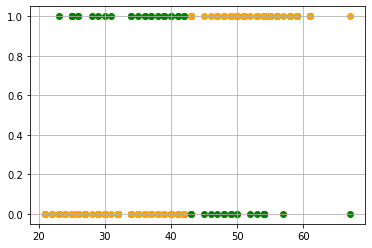

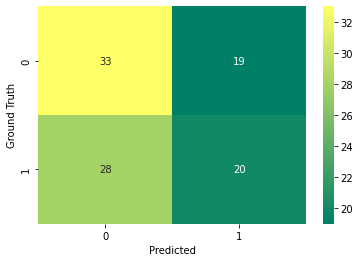

In [220]:
classification.visualize(X,y)

In [ ]:
classification.evaluate(X,y)

,accuracy,precision,recall,f1-score
0,0.53,0.512821,0.416667,0.45977


### **REFERENCE**

[1] Bhatia, R. (2019)."Drug overdose deaths". [Online]. Available: https://www.kaggle.com/ruchi798/drug-overdose-deaths

[2] Surgeon General (2016). PREVENTION PROGRAMS AND POLICIES. [Online]. Available: https://addiction.surgeongeneral.gov/executive-summary/report/prevention-programs-and-policies

[3] Hoffman, J. (2019). Basic Biostatistics for Medical and Biomedical Practitioners (Second Edition). [Online]. Available: https://www.sciencedirect.com/topics/medicine-and-dentistry/logistic-regression-analysis 